In [22]:
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt

从概率分布中抽取样本，就是抽样。为了抽取一个样本，我们需要传入一个概率向量，输出是相同长度的向量。

In [23]:
fair_probs = torch.ones([6]) / 6
# 索引i处是采样结果i出现的次数
multinomial.Multinomial(1,fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [24]:
# 我们也可以选择抽取多个样本
multinomial.Multinomial(10,fair_probs).sample()

tensor([2., 1., 2., 2., 1., 2.])

In [25]:
# 也可以计算相对频率
counts = multinomial.Multinomial(10000,fair_probs).sample()
counts / 1000

tensor([1.6550, 1.6260, 1.7170, 1.6110, 1.6640, 1.7270])

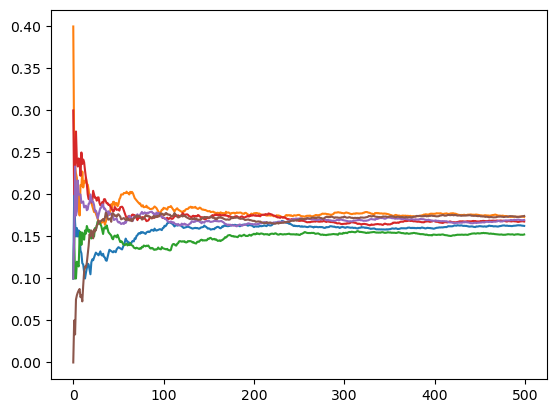

In [28]:
# 下面来看样本如何随着时间推移逐渐收敛到真实概率
counts = multinomial.Multinomial(10,fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1,keepdims=True)
for i in range(6):
    plt.plot(estimates[:,i].numpy(),label=("P(die="+str(i+1)+")"))

# 随机变量
## 联合概率
就是A=a,B=b同时发生的概率，即$P(A=a,B=b)$
## 条件概率
A=a已经发生情况下,B=b发生的概率，即$0≤\frac{P(A=a,B=b)}{P(A=a)}≤1$，并用P(B=b|A=a)表示
## 贝叶斯定理
因为$P(A，B) = P(B|A)P(A)$,而$P(A,B) = P(A|B)P(B)$，假设P(B)>0，则$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$
## 独立性
A发生与B没关系，那么P（A|B）= P(A)，$P(A|B)=\frac{P(A,B)}{P(B)}=P(A)$所以$P(A,B)=P(A)P(B)$
## 边际化
$P（B）=\sum_{A}{P(A,B)}$

# 练习
1. 假设我们有一系列随机变量，例如A、B和C,其中B只依赖于A,而C只依赖于B,能简化联合概 率P(A,B,C)吗？（提示：这是一个马尔可夫链4。）

$P(A,B,C)=P(C|A,B)P(A,B)=P(C|A,B)P(B|A)P(A)$
又因为C只依赖于B，所以$P(A,B,C)=P(C|B)P(B|A)P(A)$
